In [11]:
#AHORRO TOTAL ACUMULADO
def calcular_ahorro_total(aporte_mensual, tasa_interes_anual, años_aporte):
    tasa_interes_mensual = tasa_interes_anual / 12
    periodos = años_aporte * 12
    ahorro_total = aporte_mensual * ((1 + tasa_interes_mensual) ** periodos - 1) / tasa_interes_mensual
    return ahorro_total

#RENTA VITALICIA MENSUAL
def calcular_renta_vitalicia(ahorro_total, tasa_interes_anual, años_esperanza_vida):
    tasa_interes_mensual = tasa_interes_anual / 12
    periodos = años_esperanza_vida * 12
    renta_mensual = ahorro_total * (tasa_interes_mensual / (1 - (1 + tasa_interes_mensual) ** -periodos))
    return renta_mensual

#PARAMETROS
salario_mensual = 7000000
aporte_porcentaje = 0.16
aporte_mensual = salario_mensual * aporte_porcentaje
tasa_interes_anual = 0.04
años_aporte = 32
años_esperanza_vida = 20


ahorro_total = calcular_ahorro_total(aporte_mensual, tasa_interes_anual, años_aporte)
print(f"Ahorro total al jubilarse: ${ahorro_total:,.2f}")


renta_mensual = calcular_renta_vitalicia(ahorro_total, tasa_interes_anual, años_esperanza_vida)
print(f"Renta vitalicia mensual: ${renta_mensual:,.2f}")



Ahorro total al jubilarse: $869,901,327.02
Renta vitalicia mensual: $5,271,430.93


In [12]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

def TMensual(Tmort):
    """
    Interpola los valores de l(x) en pasos de 1/12 (mensual) y calcula q(x) y p(x).

    Parameters:
    Tmort (DataFrame): DataFrame que contiene las columnas 'x' y 'l(x)'.

    Returns:
    DataFrame: DataFrame con valores interpolados de x, l(x), q(x) y p(x).
    """

    # Aseguramos que Tmort tiene las columnas adecuadas
    if 'x' not in Tmort.columns or 'l(x)' not in Tmort.columns:
        raise ValueError("El DataFrame debe contener las columnas 'x' y 'l(x)'")

    # Obtener los valores de x y l(x)
    x_values = Tmort['x'].values
    lx_values = Tmort['l(x)'].values

    # Crear una función de interpolación
    interp_function = interp1d(x_values, lx_values, kind='linear', fill_value='extrapolate')

    # Crear los nuevos valores de x con un paso de 1/12, hasta 110 (incluyendo 110)
    new_x = np.arange(x_values[0], 110 + 1/12, 1/12)  # Incrementos mensuales hasta 110

    # Calcular los valores de l(x) interpolados
    new_lx = interp_function(new_x)

    # Inicializar los arrays para q(x) y p(x)
    qx_values = np.zeros(len(new_x) - 1)  # Inicializar el array para q(x)
    px_values = np.zeros(len(new_x) - 1)  # Inicializar el array para p(x)

    # Calcular q(x) y p(x) para cada nuevo valor de x
    for i in range(len(new_x)-1):
        if new_lx[i] > 0:  # Evitar división por cero
            qx_values[i] = 1 - (new_lx[i + 1] / new_lx[i])  # q(x) = 1 - l(x + 1/12) / l(x)
        else:
            qx_values[i] = 0  # Si l(x) es 0, q(x) también debe ser 0

        px_values[i] = 1 - qx_values[i]  # p(x) = 1 - q(x)


    # Crear un nuevo DataFrame con los valores interpolados y calculados
    interpolated_df = pd.DataFrame({
        'x': new_x,  # Incluir hasta 110
        'l(x)': new_lx,  # Excluir el último por la misma razón
        'q(x)': np.append(qx_values, 1),  # Añadir el valor de q(110)
        'p(x)': np.append(px_values, 0)  # Añadir el valor de p(110)
    })

    return interpolated_df

def tmort_filtered(df,edad):
    qx_vec=df[df['x']>=edad]
    return qx_vec

In [23]:
import pandas as pd

TM_hombres = pd.read_excel('TM_hombres.xlsx')

print(TM_hombres.head())

    x     l(x)   d(x)      q(x)  e0(x)
0  15  1000000  485.0  0.000485   64.8
1  16   999515  496.0  0.000496   63.9
2  17   999019  509.0  0.000509   62.9
3  18   998510  522.0  0.000523   61.9
4  19   997988  537.0  0.000538   60.9


In [22]:
 T_hombre=TMensual(TM_hombres)
 T_hombre

,x,l(x),q(x),p(x)
0,15.000000,1000000.000000,0.000040,0.999960
1,15.083333,999959.583333,0.000040,0.999960
2,15.166667,999919.166667,0.000040,0.999960
3,15.250000,999878.750000,0.000040,0.999960
4,15.333333,999838.333333,0.000040,0.999960
...,...,...,...,...
1136,109.666667,121.333333,0.083104,0.916896
1137,109.750000,111.250000,0.090637,0.909363
1138,109.833333,101.166667,0.099671,0.900329
1139,109.916667,91.083333,0.110704,0.889296


In [21]:
import pandas as pd

TM_mujeres = pd.read_excel('TM_mujeres.xlsx')

print(TM_mujeres.head())

    x     l(x)   d(x)      q(x)  e0(x)
0  15  1000000  272.0  0.000272   70.0
1  16   999728  278.0  0.000278   69.1
2  17   999450  285.0  0.000285   68.1
3  18   999165  293.0  0.000293   67.1
4  19   998872  302.0  0.000302   66.1


In [20]:
 T_mujer=TMensual(TM_mujeres)
 T_mujer

,x,l(x),q(x),p(x)
0,15.000000,1000000.000000,0.000023,0.999977
1,15.083333,999977.333333,0.000023,0.999977
2,15.166667,999954.666667,0.000023,0.999977
3,15.250000,999932.000000,0.000023,0.999977
4,15.333333,999909.333333,0.000023,0.999977
...,...,...,...,...
1136,109.666667,295.333333,0.083239,0.916761
1137,109.750000,270.750000,0.090797,0.909203
1138,109.833333,246.166667,0.099865,0.900135
1139,109.916667,221.583333,0.110944,0.889056


In [17]:
edad_jubilacion=62
T_hombre=tmort_filtered(T_hombre,edad_jubilacion)
print(T_hombre.head(13))
T_hombre['n']=T_hombre['x'].apply(lambda X:X -edad_jubilacion)*12
i = 0.04/12
T_hombre['Vn'] = np.ones(len(T_hombre))*(1/(1+i))
T_hombre['Vn'] = T_hombre.apply(lambda row: row['Vn'] ** row['n'],axis=1)
sum_vect = T_hombre['p(x)']*T_hombre['Vn']
suma = sum_vect.sum()
print(suma)
c = ahorro_total/suma

print(c)

             x      l(x)      q(x)      p(x)
564  62.000000  897019.0  0.000766  0.999234
565  62.083333  896331.5  0.000767  0.999233
566  62.166667  895644.0  0.000768  0.999232
567  62.250000  894956.5  0.000768  0.999232
568  62.333333  894269.0  0.000769  0.999231
569  62.416667  893581.5  0.000769  0.999231
570  62.500000  892894.0  0.000770  0.999230
571  62.583333  892206.5  0.000771  0.999229
572  62.666667  891519.0  0.000771  0.999229
573  62.750000  890831.5  0.000772  0.999228
574  62.833333  890144.0  0.000772  0.999228
575  62.916667  889456.5  0.000773  0.999227
576  63.000000  888769.0  0.000856  0.999144
254.5545084058316
3417347.948264875


<ipython-input-17-885db4af79cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_hombre['n']=T_hombre['x'].apply(lambda X:X -edad_jubilacion)*12
<ipython-input-17-885db4af79cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_hombre['Vn'] = np.ones(len(T_hombre))*(1/(1+i))
<ipython-input-17-885db4af79cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [18]:
T_longevidad = pd.read_excel('datos_longevidad.xlsx', sheet_name='Data')
T_longevidad

,Unnamed: 0,Edad,Casado,Genero,Edad_pareja,Sexo_pareja,Pago_mensual
0,1,68,0,M,0,0,4.196583e+06
1,2,67,1,H,67,H,1.983941e+06
2,3,80,1,H,77,H,4.014629e+06
3,4,71,1,H,85,M,5.710180e+06
4,5,66,0,M,0,0,7.882173e+06
...,...,...,...,...,...,...,...
1195,1196,78,0,M,0,0,2.994379e+06
1196,1197,72,1,M,69,H,3.778424e+06
1197,1198,76,0,M,0,0,3.839465e+06
1198,1199,77,0,H,0,0,1.082776e+07


In [24]:
v_jubilado=[]
v_pareja=[]
i=0.04/12
for index, row in T_longevidad.iterrows():
    genero=row['Genero']
    if genero=='H':
        tmort=T_hombre
    else:
        tmort=T_mujer
    if row['Casado']==0:
        edad=row['Edad']
        pago=row['Pago_mensual']
        T=tmort_filtered(tmort,edad)
        T['n'] = T['x'].apply(lambda x: x - edad) * 12
        T['Vn'] = np.ones(len(T)) *(1/(1+i))
        T['Vn'] = T.apply(lambda row: row['Vn'] ** row['n'], axis=1)
        sum_vect = pago * T['Vn'] * T['p(x)']
        va_jubilado = sum_vect.sum()
        va_pareja = 0

        v_jubilado.append(va_jubilado)
        v_pareja.append(va_pareja)




    elif row['Casado']==1:

        #Renta vitalicia Reversible
        edad=row['Edad']
        pago=row['Pago_mensual']
        T=tmort_filtered(tmort,edad)
        T['n'] = T['x'].apply(lambda x: x - edad)*12
        T['Vn'] = np.ones(len(T))*(1/(1+i))
        T['Vn'] = T.apply(lambda row: row['Vn'] ** row['n'], axis=1)
        sum_vect=pago*T['Vn']*T['p(x)']
        va_jubilado=sum_vect.sum()

        edad_pareja=row['Edad_pareja']
        genero_pareja=row['Sexo_pareja']
        if genero_pareja=='H':
            tmort_pareja=T_hombre
        else:
            tmort_pareja=T_mujer

        T_par=tmort_filtered(tmort_pareja,edad_pareja)
        T_par['n'] = T_par['x'].apply(lambda x: x - edad_pareja)*12
        T_par['Vn'] = np.ones(len(T_par))*(1/(1+i))
        T_par['Vn'] = T_par.apply(lambda row: row['Vn'] ** row['n'], axis=1)
        if edad<=edad_pareja:
            T_par['q(x)_Jub'] = T['q(x)'][:len(T_par)]
        else:
            lista=[]
            gap=(edad-edad_pareja)*12
            lista = list(T['q(x)'])+list(np.ones(gap))
            T_par['q(x)_Jub']=lista

        sum_vect_pareja=pago*T_par['Vn']*T_par['p(x)']*T_par['q(x)_Jub']
        va_pareja=sum_vect_pareja.sum()

        v_jubilado.append(va_jubilado)
        v_pareja.append(va_pareja)

T_longevidad['Valoracion Jubilado']=v_jubilado
T_longevidad['Valoracion pareja']=v_pareja
T_longevidad['Pago_mensual']=T_longevidad['Pago_mensual'].apply(lambda x: f'{x:,.2f}')
T_longevidad['Valoracion']=T_longevidad['Valoracion Jubilado']+T_longevidad['Valoracion pareja']
T_longevidad





Se truncaron las últimas líneas 5000 del resultado de transmisión.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_par['n'] = T_par['x'].apply(lambda x: x - edad_pareja)*12
<ipython-input-24-d3875e931bad>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_par['Vn'] = np.ones(len(T_par))*(1/(1+i))
<ipython-input-24-d3875e931bad>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T_par['Vn'] = T_par.apply(lambda row

,Unnamed: 0,Edad,Casado,Genero,Edad_pareja,Sexo_pareja,Pago_mensual,Valoracion Jubilado,Valoracion pareja,Valoracion
0,1,68,0,M,0,0,"4,196,583.06",1.017456e+09,0.000000e+00,1.017456e+09
1,2,67,1,H,67,H,"1,983,941.40",4.847842e+08,4.985841e+06,4.897701e+08
2,3,80,1,H,77,H,"4,014,628.81",8.281890e+08,5.360856e+07,8.817976e+08
3,4,71,1,H,85,M,"5,710,179.97",1.339740e+09,6.941368e+06,1.346681e+09
4,5,66,0,M,0,0,"7,882,172.76",1.946327e+09,0.000000e+00,1.946327e+09
...,...,...,...,...,...,...,...,...,...,...
1195,1196,78,0,M,0,0,"2,994,379.20",6.404825e+08,0.000000e+00,6.404825e+08
1196,1197,72,1,M,69,H,"3,778,424.20",8.779352e+08,3.605054e+07,9.139858e+08
1197,1198,76,0,M,0,0,"3,839,464.83",8.467455e+08,0.000000e+00,8.467455e+08
1198,1199,77,0,H,0,0,"10,827,760.94",2.348063e+09,0.000000e+00,2.348063e+09


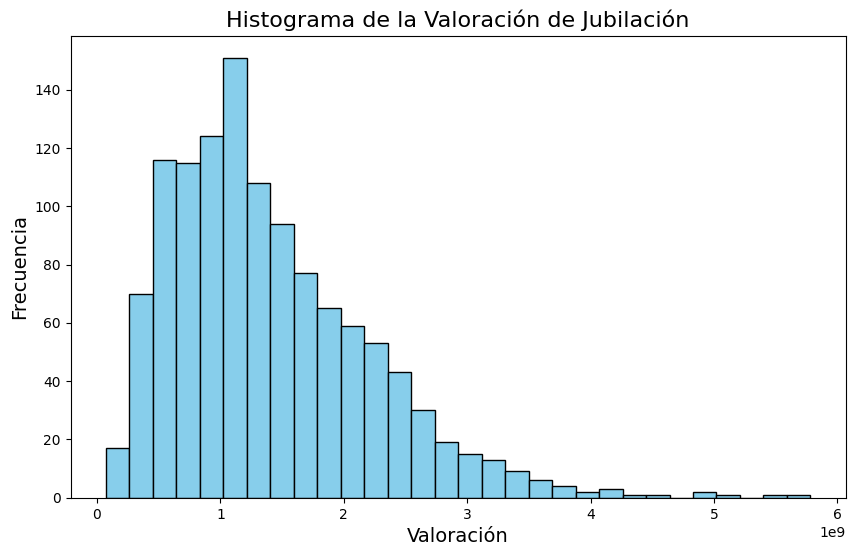

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(T_longevidad['Valoracion'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de la Valoración de Jubilación', fontsize=16)
plt.xlabel('Valoración', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

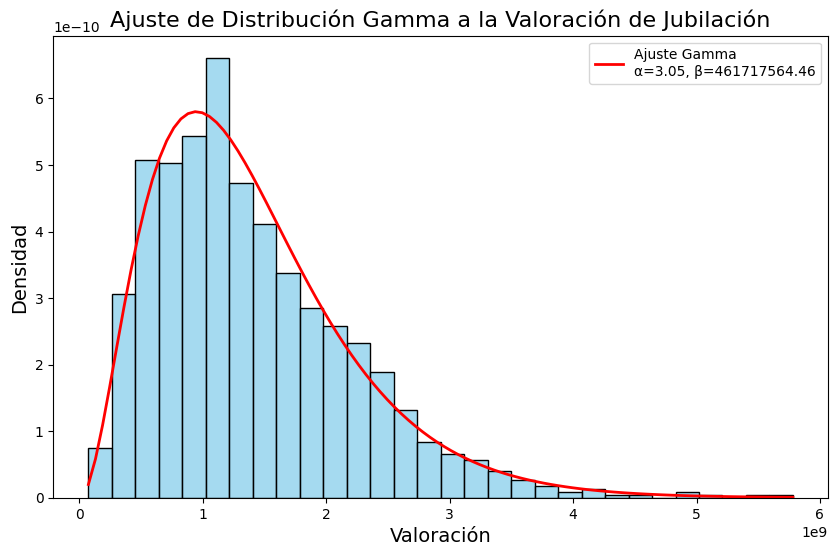

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma
params = gamma.fit(T_longevidad['Valoracion'], floc=0)

xmin, xmax = T_longevidad['Valoracion'].min(), T_longevidad['Valoracion'].max()
x = np.linspace(xmin, xmax, 100)
pdf_fitted = gamma.pdf(x, *params)
plt.figure(figsize=(10, 6))
sns.histplot(T_longevidad['Valoracion'], bins=30, kde=False, color='skyblue', stat='density', edgecolor='black')
plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'Ajuste Gamma\nα={params[0]:.2f}, β={params[2]:.2f}')
plt.title('Ajuste de Distribución Gamma a la Valoración de Jubilación', fontsize=16)
plt.xlabel('Valoración', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.legend()
plt.show()

In [27]:
# Intervalo de confianza de la distribución al 5%

shape = 2.87
scale = 479640997

quantile_5 = gamma.ppf(0.05, a=shape, scale=scale)
quantile_95 = gamma.ppf(0.95, a=shape, scale=scale)

print(f"Cuantil al 5%: {quantile_5}")
print(f"Cuantil al 95%: {quantile_95}")

Cuantil al 5%: 360576647.60582757
Cuantil al 95%: 2926050013.444586


In [29]:
Total = T_longevidad['Valoracion'].sum()
objetivo = Total*0.3
objetivo

506252650354.34235

In [30]:
T_longevidad["Propuesta"] = T_longevidad['Valoracion']*0.7
T_longevidad

,Unnamed: 0,Edad,Casado,Genero,Edad_pareja,Sexo_pareja,Pago_mensual,Valoracion Jubilado,Valoracion pareja,Valoracion,Propuesta
0,1,68,0,M,0,0,"4,196,583.06",1.017456e+09,0.000000e+00,1.017456e+09,7.122192e+08
1,2,67,1,H,67,H,"1,983,941.40",4.847842e+08,4.985841e+06,4.897701e+08,3.428391e+08
2,3,80,1,H,77,H,"4,014,628.81",8.281890e+08,5.360856e+07,8.817976e+08,6.172583e+08
3,4,71,1,H,85,M,"5,710,179.97",1.339740e+09,6.941368e+06,1.346681e+09,9.426767e+08
4,5,66,0,M,0,0,"7,882,172.76",1.946327e+09,0.000000e+00,1.946327e+09,1.362429e+09
...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,78,0,M,0,0,"2,994,379.20",6.404825e+08,0.000000e+00,6.404825e+08,4.483377e+08
1196,1197,72,1,M,69,H,"3,778,424.20",8.779352e+08,3.605054e+07,9.139858e+08,6.397900e+08
1197,1198,76,0,M,0,0,"3,839,464.83",8.467455e+08,0.000000e+00,8.467455e+08,5.927219e+08
1198,1199,77,0,H,0,0,"10,827,760.94",2.348063e+09,0.000000e+00,2.348063e+09,1.643644e+09


In [32]:
T_longevidad["Propuesta"] = T_longevidad['Valoracion']*0.7
T_longevidad

,Unnamed: 0,Edad,Casado,Genero,Edad_pareja,Sexo_pareja,Pago_mensual,Valoracion Jubilado,Valoracion pareja,Valoracion,Propuesta
0,1,68,0,M,0,0,"4,196,583.06",1.017456e+09,0.000000e+00,1.017456e+09,7.122192e+08
1,2,67,1,H,67,H,"1,983,941.40",4.847842e+08,4.985841e+06,4.897701e+08,3.428391e+08
2,3,80,1,H,77,H,"4,014,628.81",8.281890e+08,5.360856e+07,8.817976e+08,6.172583e+08
3,4,71,1,H,85,M,"5,710,179.97",1.339740e+09,6.941368e+06,1.346681e+09,9.426767e+08
4,5,66,0,M,0,0,"7,882,172.76",1.946327e+09,0.000000e+00,1.946327e+09,1.362429e+09
...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,78,0,M,0,0,"2,994,379.20",6.404825e+08,0.000000e+00,6.404825e+08,4.483377e+08
1196,1197,72,1,M,69,H,"3,778,424.20",8.779352e+08,3.605054e+07,9.139858e+08,6.397900e+08
1197,1198,76,0,M,0,0,"3,839,464.83",8.467455e+08,0.000000e+00,8.467455e+08,5.927219e+08
1198,1199,77,0,H,0,0,"10,827,760.94",2.348063e+09,0.000000e+00,2.348063e+09,1.643644e+09


In [33]:
df_sim = pd.DataFrame()
df_sim['key']=list(T_longevidad.index)
df_sim['Valoracion']=list(T_longevidad.Valoracion)

d = 0.7
df_sim['Pago_hoy'] = (d)*df_sim['Valoracion']

sim=500
p=0.17

for i in range(sim):
    samples = np.random.binomial(1,p,len(df_sim))
    df_sim['sim_'+str(i)]=samples
    df_sim['sim_'+str(i)]=df_sim.apply(
        lambda row: row['Pago_hoy'] if row ['sim_'+str(i)]==1 else row['Valoracion'],axis=1)

<ipython-input-33-10f16f224aad>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sim['sim_'+str(i)]=samples
<ipython-input-33-10f16f224aad>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sim['sim_'+str(i)]=samples
<ipython-input-33-10f16f224aad>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy(

In [34]:
sim_columns = [col for col in df_sim.columns if col.startswith('sim_')]
df_sum = pd.DataFrame({'columna': sim_columns, 'suma': df_sim[sim_columns].sum()})
df_sum

,columna,suma
sim_0,sim_0,1.607006e+12
sim_1,sim_1,1.591464e+12
sim_2,sim_2,1.608020e+12
sim_3,sim_3,1.603222e+12
sim_4,sim_4,1.604295e+12
...,...,...
sim_495,sim_495,1.611607e+12
sim_496,sim_496,1.601691e+12
sim_497,sim_497,1.601129e+12
sim_498,sim_498,1.594488e+12


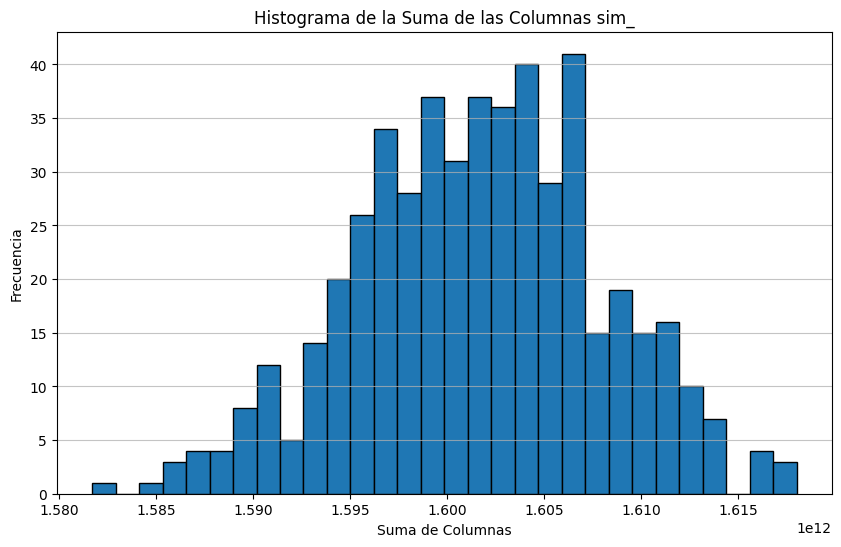

In [35]:
#histograma
plt.figure(figsize=(10, 6))
plt.hist(df_sum['suma'], bins=30, edgecolor='black')
plt.title('Histograma de la Suma de las Columnas sim_')
plt.xlabel('Suma de Columnas')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [36]:
#cuantil 95
cuantil_95 = df_sum['suma'].quantile(0.95)

print(f"El cuantil 95 de la suma de las columnas es: {cuantil_95}")

El cuantil 95 de la suma de las columnas es: 1611847832767.3677


In [40]:
#Ahorro
ahorro_simulado=Total-cuantil_95
print(ahorro_simulado)
print(objetivo)

75661001747.10693
506252650354.34235
